In [7]:
from google.colab import files
upload = files.upload()
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

#read the data
df = pd.read_csv("crop recommendation data set.csv")
df.head()



Saving crop recommendation data set.csv to crop recommendation data set (1).csv


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df.shape

(2200, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
#Check the missing values in dataset
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [12]:
# Check the duplicated values in the dataset
df.duplicated().sum()

np.int64(0)

In [13]:
df.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [14]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [15]:
#Check target distribution
df["label"].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [16]:
features = df.columns.to_list()
features.remove("label")
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


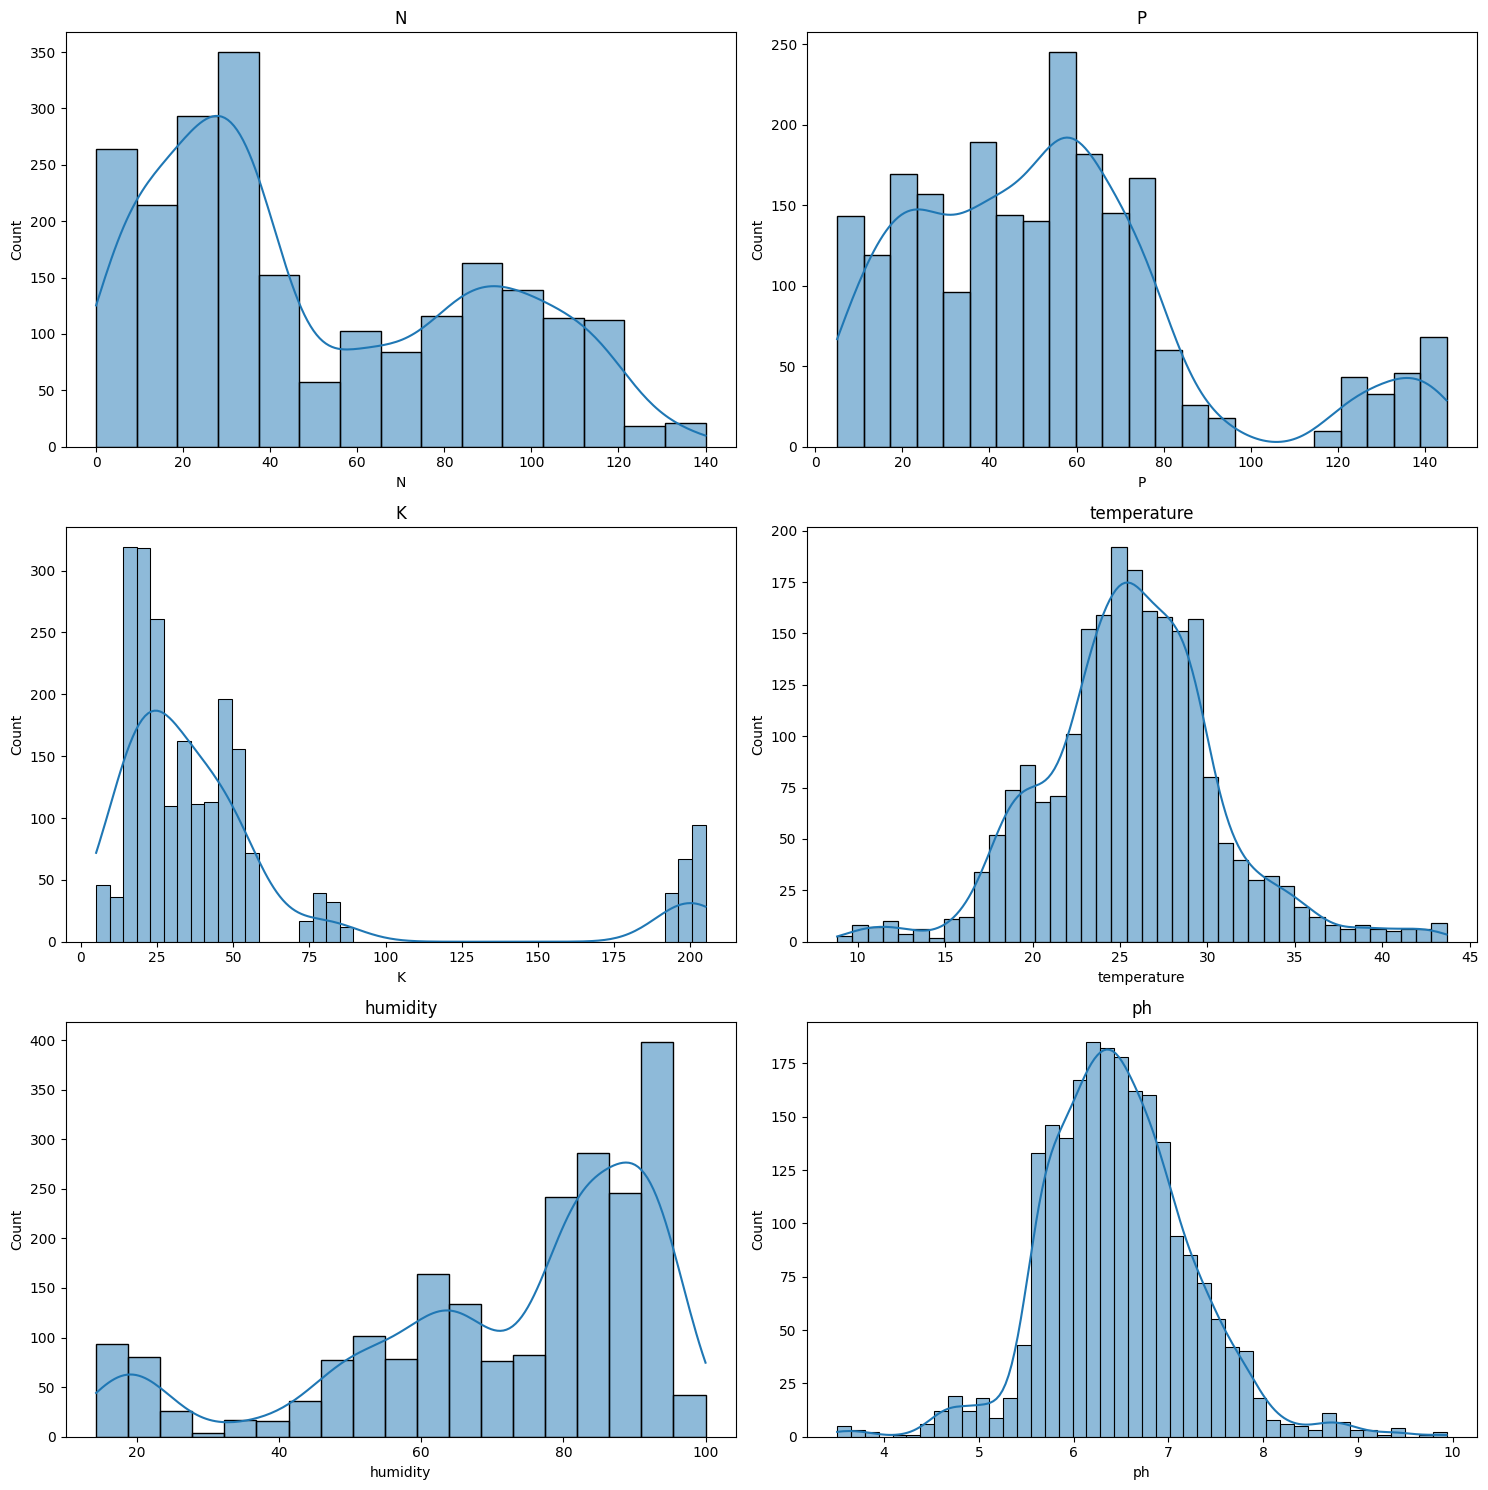

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined 'df' and 'features'
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(df[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

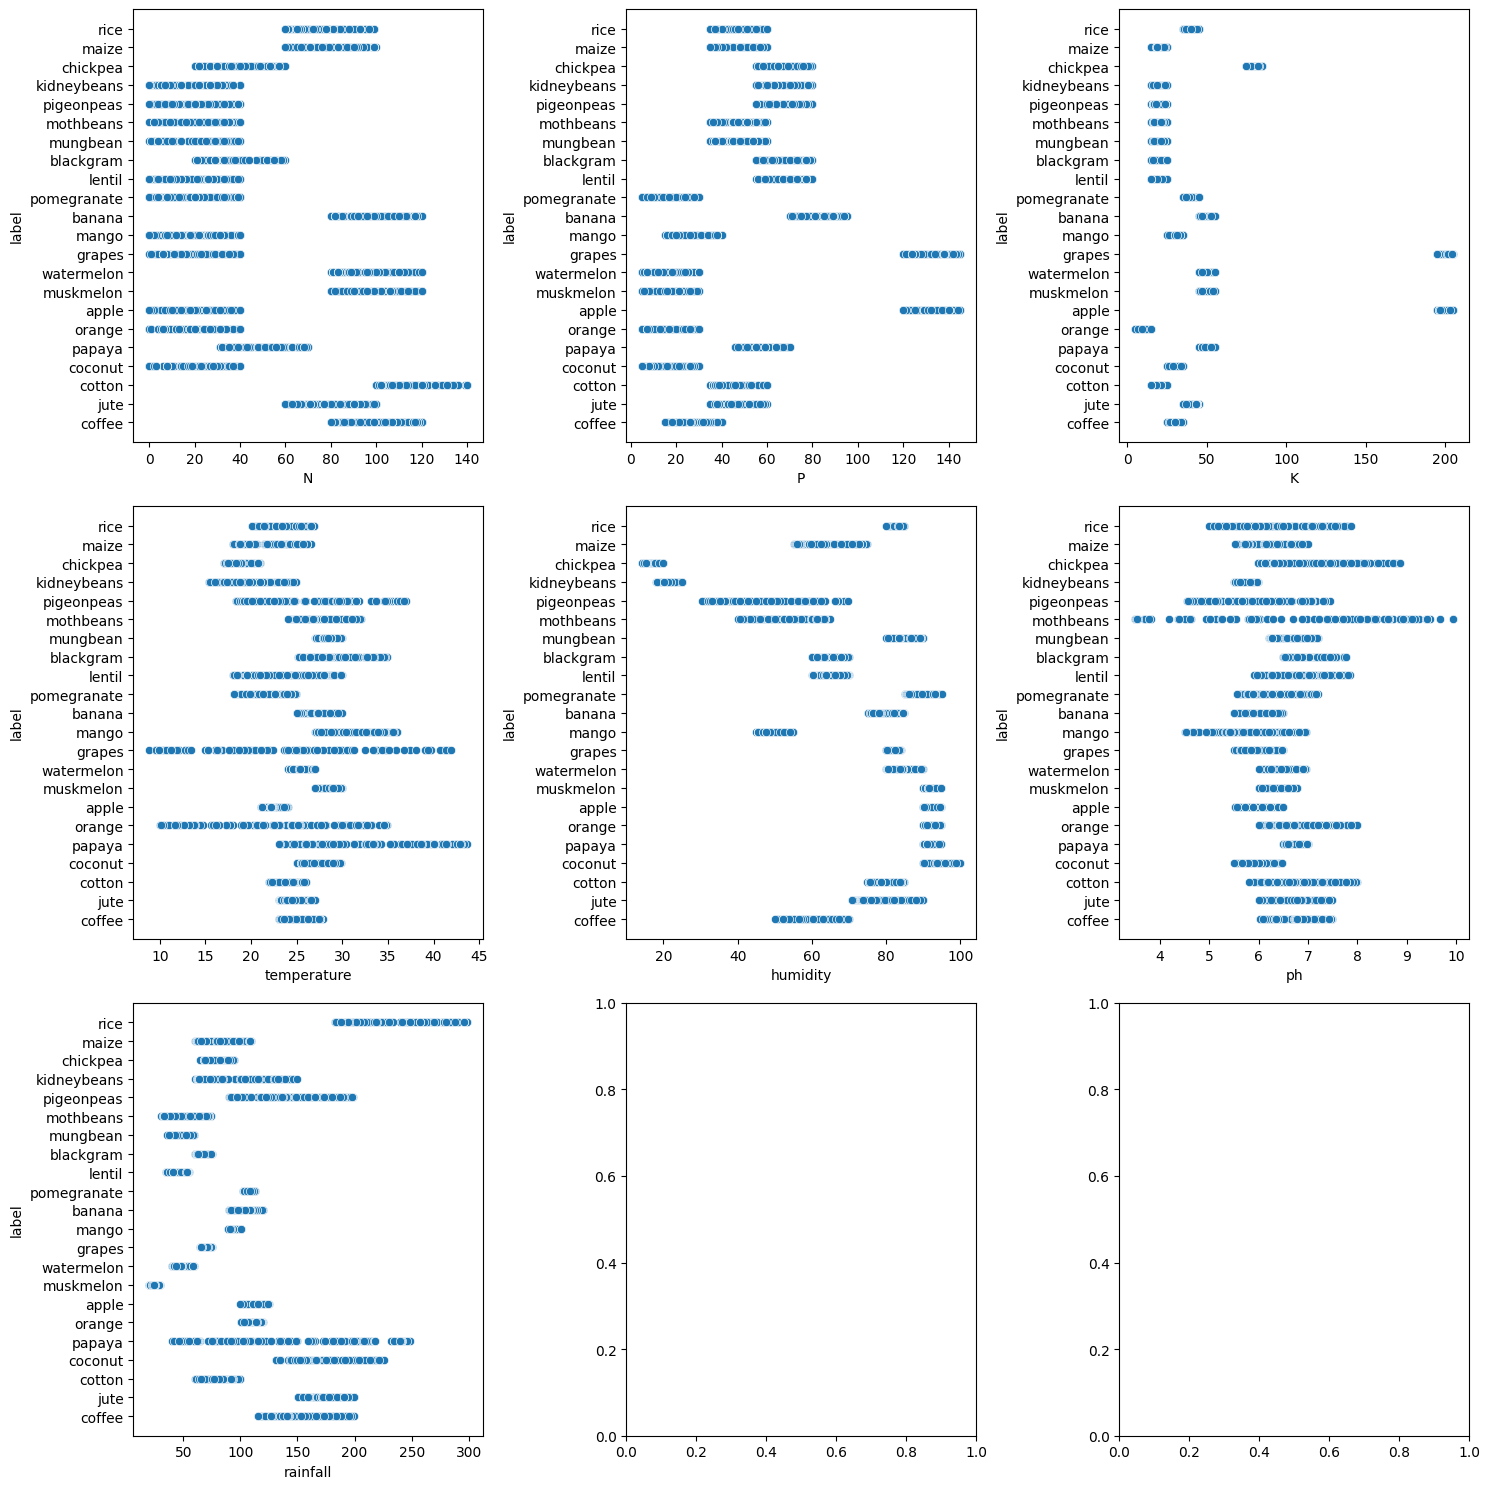

In [21]:
fig,ax = plt.subplots(3,3, figsize = (15,15))
for i, subplot in zip(features,ax.flatten()):
    sns.scatterplot(x=i, y= "label",data = df, ax=subplot)
plt.tight_layout()
plt.show()

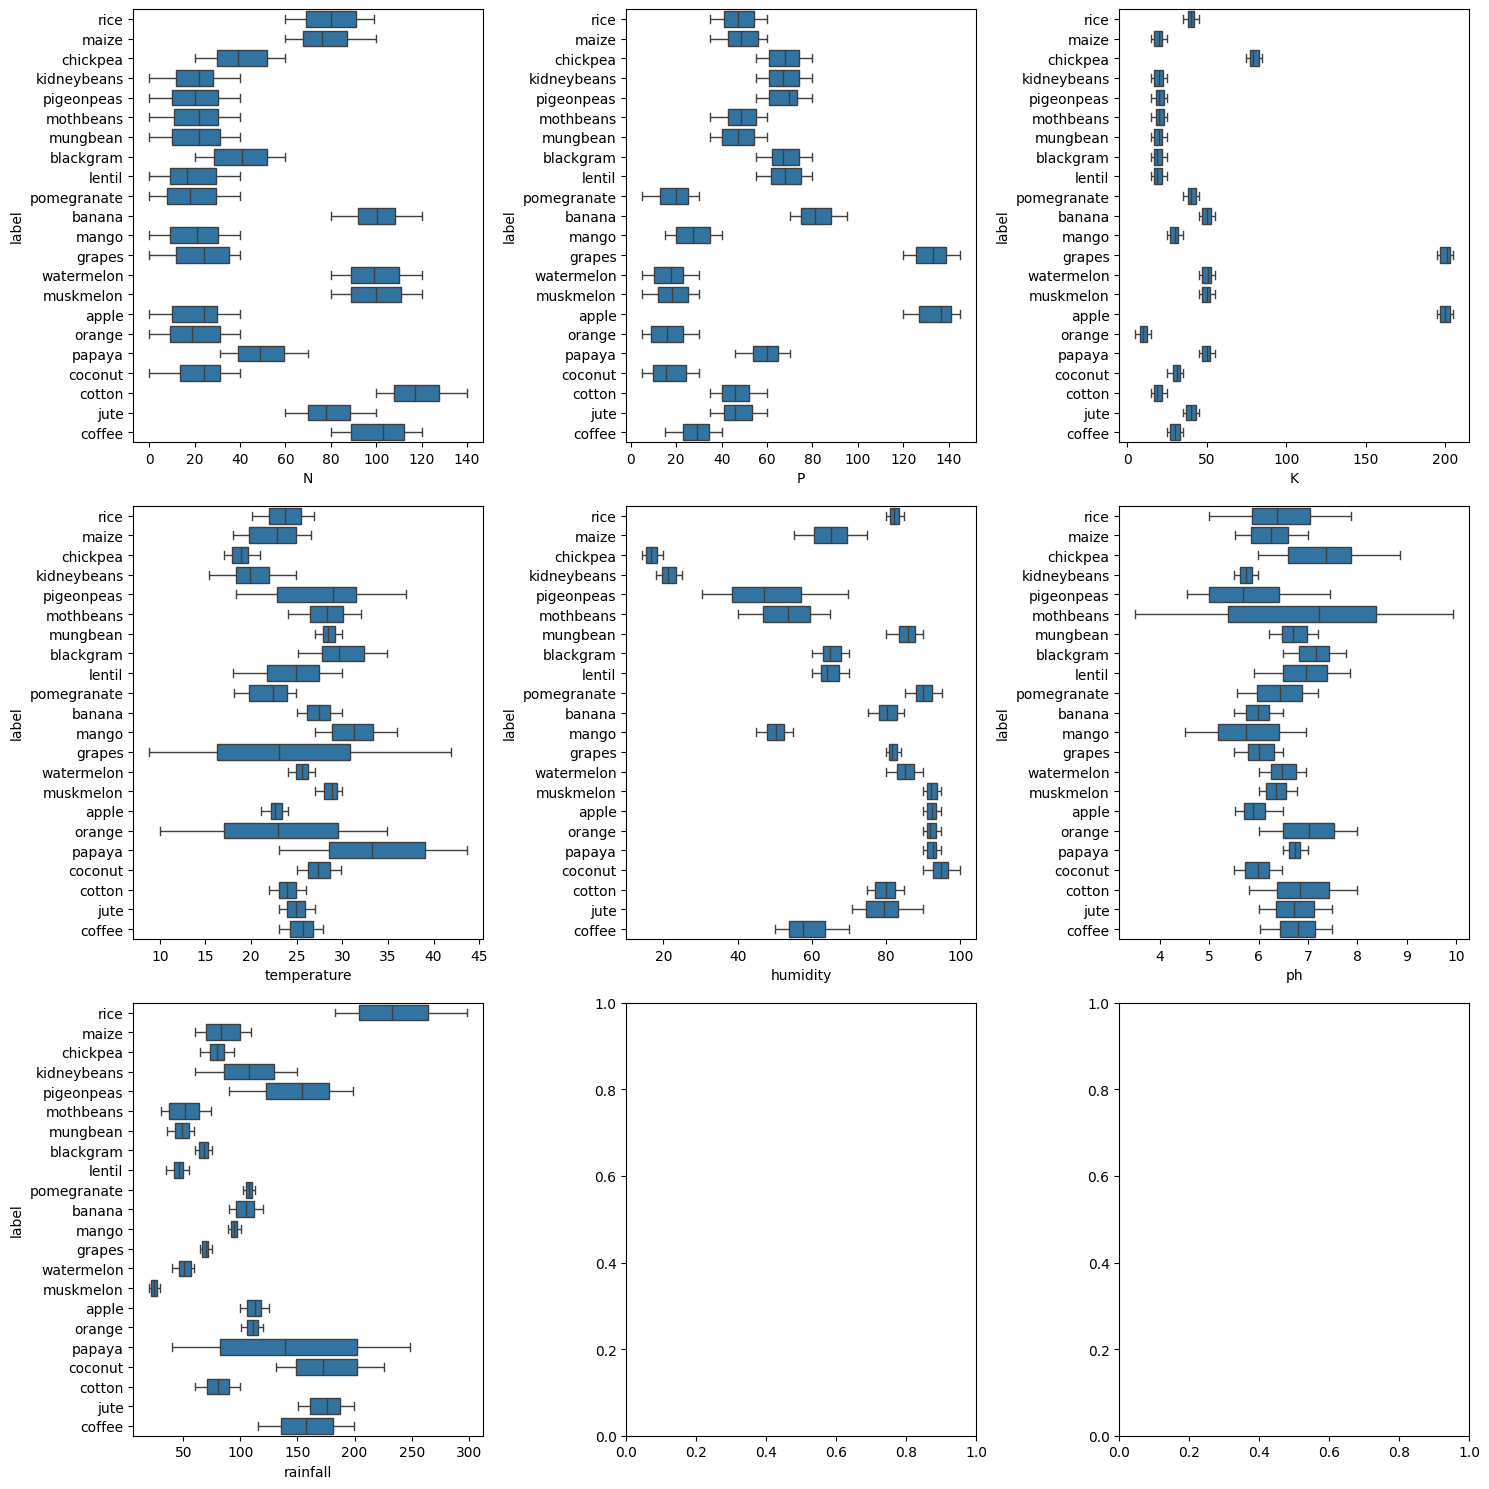

In [22]:
fig,ax = plt.subplots(3,3, figsize = (15,15))
for i, subplot in zip(features,ax.flatten()):
    sns.boxplot(x=i, y= "label",data = df, ax=subplot)
plt.tight_layout()
plt.show()

In [23]:
#Check the correlation of the features
numeric_columns = df.select_dtypes(include = [np.number])
corr = numeric_columns.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

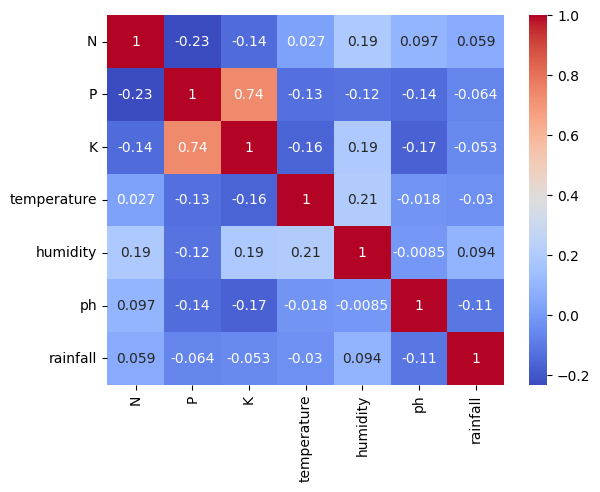

In [24]:
sns.heatmap(corr,annot = True,cbar = True,cmap="coolwarm")

In [26]:
#Encoding
crop_dict = {
'rice':1,
'maize':2,
'jute':3,
'cotton':4,
'coconut':5,
'papaya':6,
'orange':7,
'apple':8,
'muskmelon':9,
'watermelon':10,
'grapes':11,
'mango':12,
'banana':13,
'pomegranate':14,
'lentil':15,
'blackgram':16,
'mungbean':17,
'mothbeans':18,
'pigeonpeas':19,
'kidneybeans':20,
'chickpea':21,
'coffee': 22,
}

In [27]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [28]:
df['crop_no'] = df['label'].map(crop_dict)

In [29]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [30]:
df['crop_no'].value_counts()

,count
crop_no,
1,100
2,100
21,100
20,100
19,100
18,100
17,100
16,100
15,100


In [31]:
df.drop('label',axis=1,inplace=True)
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,22


In [32]:
#Train Test Split
x = df.drop('crop_no',axis=1)
y = df['crop_no']

print(f"The shape of x is : {x.shape}")
print(f"The shape of y is : {y.shape}")

The shape of x is : (2200, 7)
The shape of y is : (2200,)


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)